Import Libraries :

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Create a Dataset : 

In [61]:
dataset = pd.read_csv('calories.csv')

Explore Dataset :

In [62]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [63]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [65]:
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [66]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [67]:
dataset['Gender'].unique()

array(['male', 'female'], dtype=object)

Encoding categorical Features :

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [70]:
dataset.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


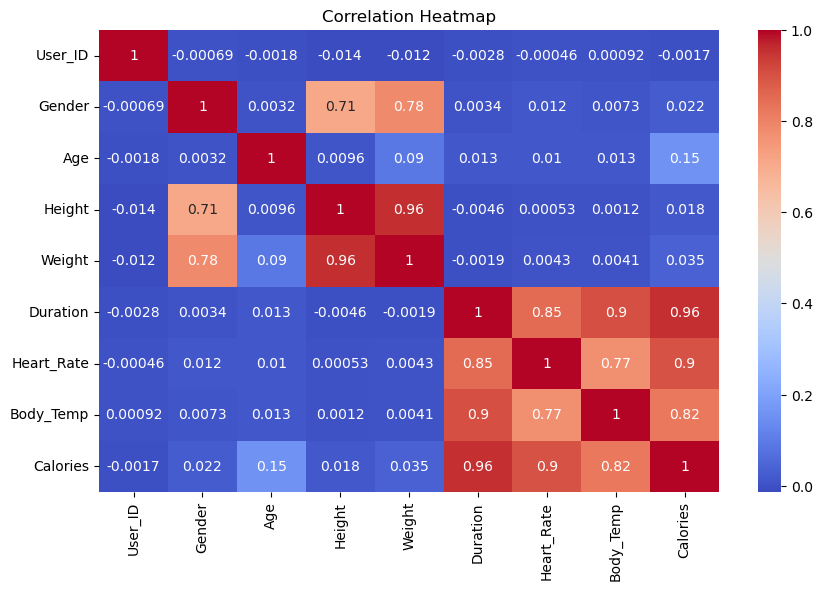

In [71]:
##Heat map for corrlation matrix :
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Dropping useless Features :

In [72]:
dataset.drop('User_ID',axis=1,inplace=True)
dataset.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [73]:
dataset.info()
##no more categorical columns in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


Saving the cleaned Dataset :

In [74]:
dataset.to_csv('CleanedCalories.csv', index=False)

Feature Scaling :


In [75]:
!pip install joblib

In [76]:
from sklearn.preprocessing import StandardScaler
import joblib
X = dataset.drop('Calories', axis=1)
y = dataset['Calories']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [77]:
!pip install tensorflow


Building the Neural NetWork :

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer


/Users/vardhanbharathula/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model :


In [79]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


Train Test Split :

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - loss: 8192.9619 - mae: 68.7123 - val_loss: 156.4588 - val_mae: 9.8218
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 138.9909 - mae: 9.3350 - val_loss: 84.8052 - val_mae: 7.2902
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 74.6662 - mae: 6.8729 - val_loss: 45.9516 - val_mae: 5.3242
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 38.7358 - mae: 4.8020 - val_loss: 21.2363 - val_mae: 3.4621
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 16.7306 - mae: 3.0511 - val_loss: 10.2400 - val_mae: 2.3295
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 8.7178 - mae: 2.1261 - val_loss: 6.2204 - val_mae: 1.7505
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 5.5666 - mae: 1.6536 - val_loss: 4.3287 - val_mae: 1.4782
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 3.9005 - mae: 1.3841 - val_loss: 3.2687 - val_mae: 1.2923
Epoch 9/100
375/3

Predicting for new DataPoints :

In [81]:
predictions = model.predict(X_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


Performance Metrics :


In [82]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")

R² Score: 1.00
MSE: 0.16


SAVING THE MODEL :

In [83]:
model.save("calorie_predictor_model.h5")
